In [27]:
import torch
import torchvision
from torchvision import transforms, datasets

In [28]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])) # download training data and transform it into a torch tensor


test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])) # same but for testing data



In [29]:

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
# Batch_size = is the size of each batch being passed to the model at a time, a batch is a set of samples of length batch_size, each sample is made of an input feature vector and a corresponding label (target value).
# shuffle = shuffle the data to improve generalization


testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)


In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # running the init method of nn.Module
        self.fc1 = nn.Linear(28*28, 64) # fc1 means a  Fully Connected Layer
        self.fc2 = nn.Linear(64, 64) # has to take in 64 because fc1 outputs 64
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # our finaly output layour only has 10 neurons


    def forward(self, x):
        x = F.relu(self.fc1(x)) # run the rectified linear activation function over the fc1 layer's output
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1) # softmax will return a probability distribution
        

net = Net()

print(net)

        



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28) # reshape X essentially flattening it

In [19]:
output = net(X)

In [20]:
output

tensor([[-2.3778, -2.2388, -2.4616, -2.2734, -2.3471, -2.3030, -2.3909, -2.2462,
         -2.2403, -2.1801]], grad_fn=<LogSoftmaxBackward0>)

In [21]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3 # defines how many times we iterate and feed over the trainset to the model


for epoch in range(EPOCHS):
    for data in trainset: # data is a batch of features and labels
        X, y = data
        net.zero_grad() # zeroing the gradient

        output = net(X.view(-1, 28*28))

        loss = F.nll_loss(output, y) # calculating the loss (Compute the negative log likelihood loss)

        loss.backward()

        optimizer.step()

    print(loss)

        
        

tensor(0.0182, grad_fn=<NllLossBackward0>)
tensor(0.0188, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)


In [22]:

correct = 0
total = 0

with torch.no_grad(): # no_grad tells torch not to calculate the gradient because we don't want to adjust since we're only testing the network
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))

        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
                
            total += 1


print(f"Accuracy:  {round(correct/total, 3)}")

Accuracy:  0.975


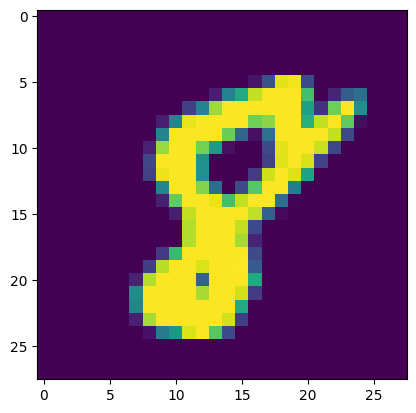

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28, 28))
plt.show()


In [26]:
print(torch.argmax(net(X[3].view(-1, 28*28))[0]))
# "torch.argmax" return the indices of maximum value of all the elements in the input tensor wheras "torch.argmin" will return minimum value of all the elements in the input tensor.

# net will return a list of 10 which is our last output layer and argmax will return the maximum value

tensor(8)


> The model now has an accuracy of **98.6%** and it accurately predicted **5**